### Common Task 1: Electron/Photon Classification

**Dataset**:  
- Photon: [CERNBox Link](https://cernbox.cern.ch/index.php/s/AtBT8y4MiQYFcgc)  
- Electron: [CERNBox Link](https://cernbox.cern.ch/index.php/s/FbXw3V4XNyYB3oA)

**Objective**:  
Train a ResNet-15-like model to classify electrons vs. photons from detector hits using energy & time channels.

---

### Solution Overview

- **Preprocessing**: Loaded HDF5, reshaped to (C=2, 32, 32). Combined both classes with proper labels.
- **Split**: Although 80:20 train/test was suggested, used **70:15:15** (train/val/test) to monitor generalization and avoid overfitting.
- **Augmentations**:  
  - **Train**: Flip, rotate, affine, erasing, normalization.  
  - **Val/Test**: Normalization only.
- **Model**: Custom ResNet-15 with:
  - Pre-activation residual blocks  
  - Squeeze-and-Excitation (SE) blocks  
  - Attention before final FC  
  - Grouped convs + dropout for regularization
- **Training Tricks**:  
  - Focal Loss (class imbalance)  
  - Mixup (data-level regularization)  
  - OneCycleLR  
  - Gradient clipping + dropout (0.5)  
  - Mixed precision (`GradScaler`) for stability/speed

**Evaluation**: Classification report + Confusion matrix  


### Known Issue

At the final stage, while visualizing the learned features using **t-SNE**, a `RuntimeError` occurred due to a shape mismatch in the linear layer:


This likely stems from incorrect flattening or a mismatch in expected input shape to a linear layer during feature extraction.

Unfortunately, I was unable to rerun the cell to debug this due to **exhausted Colab GPU credits**. The training and evaluation were completed successfully, and the error only affected the final visualization step. The rest of the pipeline and results remain valid.

I will revisit and fix this once GPU access is restored.




Mounted at /content/drive
Using device: cuda


<ipython-input-1-91bc2f4f03f3>:234: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()


Starting training...


Epoch [1/50]:   0%|          | 0/1362 [00:00<?, ?it/s]<ipython-input-1-91bc2f4f03f3>:258: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Epoch [1/50]: 100%|██████████| 1362/1362 [03:32<00:00,  6.41it/s, loss=0.043]


Epoch 1/50: Train Loss: 0.0430, Val Loss: 0.0425, Val Acc: 56.33%
Model saved with validation accuracy: 56.33%


Epoch [2/50]: 100%|██████████| 1362/1362 [03:30<00:00,  6.48it/s, loss=0.042]


Epoch 2/50: Train Loss: 0.0420, Val Loss: 0.0418, Val Acc: 59.51%
Model saved with validation accuracy: 59.51%


Epoch [3/50]: 100%|██████████| 1362/1362 [03:33<00:00,  6.39it/s, loss=0.0417]


Epoch 3/50: Train Loss: 0.0416, Val Loss: 0.0417, Val Acc: 60.20%
Model saved with validation accuracy: 60.20%


Epoch [4/50]: 100%|██████████| 1362/1362 [03:33<00:00,  6.38it/s, loss=0.0415]


Epoch 4/50: Train Loss: 0.0415, Val Loss: 0.0420, Val Acc: 59.31%


Epoch [5/50]: 100%|██████████| 1362/1362 [03:33<00:00,  6.39it/s, loss=0.0413]


Epoch 5/50: Train Loss: 0.0413, Val Loss: 0.0410, Val Acc: 61.38%
Model saved with validation accuracy: 61.38%


Epoch [6/50]: 100%|██████████| 1362/1362 [03:31<00:00,  6.43it/s, loss=0.0411]


Epoch 6/50: Train Loss: 0.0411, Val Loss: 0.0461, Val Acc: 56.53%


Epoch [7/50]: 100%|██████████| 1362/1362 [03:32<00:00,  6.42it/s, loss=0.0407]


Epoch 7/50: Train Loss: 0.0407, Val Loss: 0.0406, Val Acc: 62.37%
Model saved with validation accuracy: 62.37%


Epoch [8/50]: 100%|██████████| 1362/1362 [03:31<00:00,  6.44it/s, loss=0.0401]


Epoch 8/50: Train Loss: 0.0401, Val Loss: 0.0455, Val Acc: 58.33%


Epoch [9/50]: 100%|██████████| 1362/1362 [03:33<00:00,  6.37it/s, loss=0.0395]


Epoch 9/50: Train Loss: 0.0395, Val Loss: 0.0440, Val Acc: 53.67%


Epoch [10/50]: 100%|██████████| 1362/1362 [03:33<00:00,  6.37it/s, loss=0.0389]


Epoch 10/50: Train Loss: 0.0389, Val Loss: 0.0388, Val Acc: 66.28%
Model saved with validation accuracy: 66.28%


Epoch [11/50]: 100%|██████████| 1362/1362 [03:34<00:00,  6.34it/s, loss=0.0387]


Epoch 11/50: Train Loss: 0.0387, Val Loss: 0.0395, Val Acc: 64.79%


Epoch [12/50]: 100%|██████████| 1362/1362 [03:32<00:00,  6.40it/s, loss=0.0385]


Epoch 12/50: Train Loss: 0.0384, Val Loss: 0.0675, Val Acc: 49.76%


Epoch [13/50]: 100%|██████████| 1362/1362 [03:33<00:00,  6.39it/s, loss=0.0383]


Epoch 13/50: Train Loss: 0.0383, Val Loss: 0.0413, Val Acc: 60.73%


Epoch [14/50]: 100%|██████████| 1362/1362 [03:32<00:00,  6.42it/s, loss=0.0383]


Epoch 14/50: Train Loss: 0.0383, Val Loss: 0.0394, Val Acc: 65.79%


Epoch [15/50]: 100%|██████████| 1362/1362 [03:31<00:00,  6.44it/s, loss=0.038]


Epoch 15/50: Train Loss: 0.0380, Val Loss: 0.0447, Val Acc: 50.32%


Epoch [16/50]: 100%|██████████| 1362/1362 [03:32<00:00,  6.42it/s, loss=0.0379]


Epoch 16/50: Train Loss: 0.0379, Val Loss: 0.0376, Val Acc: 68.24%
Model saved with validation accuracy: 68.24%


Epoch [17/50]: 100%|██████████| 1362/1362 [03:31<00:00,  6.44it/s, loss=0.0376]


Epoch 17/50: Train Loss: 0.0376, Val Loss: 0.0391, Val Acc: 67.76%


Epoch [18/50]: 100%|██████████| 1362/1362 [03:31<00:00,  6.43it/s, loss=0.0374]


Epoch 18/50: Train Loss: 0.0374, Val Loss: 0.0382, Val Acc: 67.81%


Epoch [19/50]: 100%|██████████| 1362/1362 [03:34<00:00,  6.36it/s, loss=0.0376]


Epoch 19/50: Train Loss: 0.0375, Val Loss: 0.0372, Val Acc: 68.61%
Model saved with validation accuracy: 68.61%


Epoch [20/50]: 100%|██████████| 1362/1362 [03:32<00:00,  6.40it/s, loss=0.0375]


Epoch 20/50: Train Loss: 0.0375, Val Loss: 0.0395, Val Acc: 67.23%


Epoch [21/50]: 100%|██████████| 1362/1362 [03:32<00:00,  6.41it/s, loss=0.0374]


Epoch 21/50: Train Loss: 0.0374, Val Loss: 0.0796, Val Acc: 52.83%


Epoch [22/50]: 100%|██████████| 1362/1362 [03:31<00:00,  6.45it/s, loss=0.0376]


Epoch 22/50: Train Loss: 0.0376, Val Loss: 0.0534, Val Acc: 52.10%


Epoch [23/50]: 100%|██████████| 1362/1362 [03:34<00:00,  6.36it/s, loss=0.0372]


Epoch 23/50: Train Loss: 0.0372, Val Loss: 0.0617, Val Acc: 50.46%


Epoch [24/50]: 100%|██████████| 1362/1362 [03:32<00:00,  6.41it/s, loss=0.0373]


Epoch 24/50: Train Loss: 0.0373, Val Loss: 0.0366, Val Acc: 69.75%
Model saved with validation accuracy: 69.75%


Epoch [25/50]: 100%|██████████| 1362/1362 [03:33<00:00,  6.39it/s, loss=0.0374]


Epoch 25/50: Train Loss: 0.0374, Val Loss: 0.0384, Val Acc: 65.74%


Epoch [26/50]: 100%|██████████| 1362/1362 [03:31<00:00,  6.43it/s, loss=0.0372]


Epoch 26/50: Train Loss: 0.0372, Val Loss: 0.0376, Val Acc: 67.87%


Epoch [27/50]: 100%|██████████| 1362/1362 [03:32<00:00,  6.42it/s, loss=0.037]


Epoch 27/50: Train Loss: 0.0370, Val Loss: 0.0364, Val Acc: 70.07%
Model saved with validation accuracy: 70.07%


Epoch [28/50]: 100%|██████████| 1362/1362 [03:33<00:00,  6.37it/s, loss=0.0371]


Epoch 28/50: Train Loss: 0.0371, Val Loss: 0.0410, Val Acc: 59.26%


Epoch [29/50]: 100%|██████████| 1362/1362 [03:32<00:00,  6.40it/s, loss=0.037]


Epoch 29/50: Train Loss: 0.0370, Val Loss: 0.0408, Val Acc: 60.53%


Epoch [30/50]: 100%|██████████| 1362/1362 [03:33<00:00,  6.38it/s, loss=0.037]


Epoch 30/50: Train Loss: 0.0370, Val Loss: 0.0369, Val Acc: 69.54%


Epoch [31/50]: 100%|██████████| 1362/1362 [03:34<00:00,  6.36it/s, loss=0.037]


Epoch 31/50: Train Loss: 0.0369, Val Loss: 0.0371, Val Acc: 69.31%


Epoch [32/50]: 100%|██████████| 1362/1362 [03:31<00:00,  6.44it/s, loss=0.0369]


Epoch 32/50: Train Loss: 0.0369, Val Loss: 0.0366, Val Acc: 70.15%
Model saved with validation accuracy: 70.15%


Epoch [33/50]: 100%|██████████| 1362/1362 [03:34<00:00,  6.35it/s, loss=0.0368]


Epoch 33/50: Train Loss: 0.0368, Val Loss: 0.0363, Val Acc: 70.30%
Model saved with validation accuracy: 70.30%


Epoch [34/50]: 100%|██████████| 1362/1362 [03:36<00:00,  6.30it/s, loss=0.0368]


Epoch 34/50: Train Loss: 0.0368, Val Loss: 0.0361, Val Acc: 70.44%
Model saved with validation accuracy: 70.44%


Epoch [35/50]: 100%|██████████| 1362/1362 [03:34<00:00,  6.34it/s, loss=0.0368]


Epoch 35/50: Train Loss: 0.0368, Val Loss: 0.0372, Val Acc: 68.79%


Epoch [36/50]: 100%|██████████| 1362/1362 [03:34<00:00,  6.36it/s, loss=0.0368]


Epoch 36/50: Train Loss: 0.0368, Val Loss: 0.0364, Val Acc: 70.46%
Model saved with validation accuracy: 70.46%


Epoch [37/50]: 100%|██████████| 1362/1362 [03:35<00:00,  6.32it/s, loss=0.0367]


Epoch 37/50: Train Loss: 0.0367, Val Loss: 0.0362, Val Acc: 70.22%


Epoch [38/50]: 100%|██████████| 1362/1362 [03:33<00:00,  6.38it/s, loss=0.0367]


Epoch 38/50: Train Loss: 0.0367, Val Loss: 0.0362, Val Acc: 70.28%


Epoch [39/50]: 100%|██████████| 1362/1362 [03:33<00:00,  6.39it/s, loss=0.0368]


Epoch 39/50: Train Loss: 0.0368, Val Loss: 0.0361, Val Acc: 70.55%
Model saved with validation accuracy: 70.55%


Epoch [40/50]: 100%|██████████| 1362/1362 [03:33<00:00,  6.39it/s, loss=0.0366]


Epoch 40/50: Train Loss: 0.0366, Val Loss: 0.0370, Val Acc: 69.32%


Epoch [41/50]: 100%|██████████| 1362/1362 [03:34<00:00,  6.36it/s, loss=0.0366]


Epoch 41/50: Train Loss: 0.0366, Val Loss: 0.0366, Val Acc: 69.81%


Epoch [42/50]: 100%|██████████| 1362/1362 [03:32<00:00,  6.41it/s, loss=0.0366]


Epoch 42/50: Train Loss: 0.0366, Val Loss: 0.0359, Val Acc: 70.76%
Model saved with validation accuracy: 70.76%


Epoch [43/50]: 100%|██████████| 1362/1362 [03:36<00:00,  6.29it/s, loss=0.0366]


Epoch 43/50: Train Loss: 0.0366, Val Loss: 0.0360, Val Acc: 70.46%


Epoch [44/50]: 100%|██████████| 1362/1362 [03:32<00:00,  6.41it/s, loss=0.0365]


Epoch 44/50: Train Loss: 0.0365, Val Loss: 0.0358, Val Acc: 70.88%
Model saved with validation accuracy: 70.88%


Epoch [45/50]: 100%|██████████| 1362/1362 [03:34<00:00,  6.34it/s, loss=0.0365]


Epoch 45/50: Train Loss: 0.0365, Val Loss: 0.0359, Val Acc: 70.71%


Epoch [46/50]: 100%|██████████| 1362/1362 [03:33<00:00,  6.39it/s, loss=0.0365]


Epoch 46/50: Train Loss: 0.0365, Val Loss: 0.0360, Val Acc: 70.59%


Epoch [47/50]: 100%|██████████| 1362/1362 [03:33<00:00,  6.37it/s, loss=0.0366]


Epoch 47/50: Train Loss: 0.0366, Val Loss: 0.0360, Val Acc: 70.62%


Epoch [48/50]: 100%|██████████| 1362/1362 [03:34<00:00,  6.35it/s, loss=0.0364]


Epoch 48/50: Train Loss: 0.0364, Val Loss: 0.0360, Val Acc: 70.65%


Epoch [49/50]: 100%|██████████| 1362/1362 [03:31<00:00,  6.43it/s, loss=0.0365]


Epoch 49/50: Train Loss: 0.0365, Val Loss: 0.0360, Val Acc: 70.68%


Epoch [50/50]: 100%|██████████| 1362/1362 [03:34<00:00,  6.35it/s, loss=0.0365]


Epoch 50/50: Train Loss: 0.0365, Val Loss: 0.0361, Val Acc: 70.50%


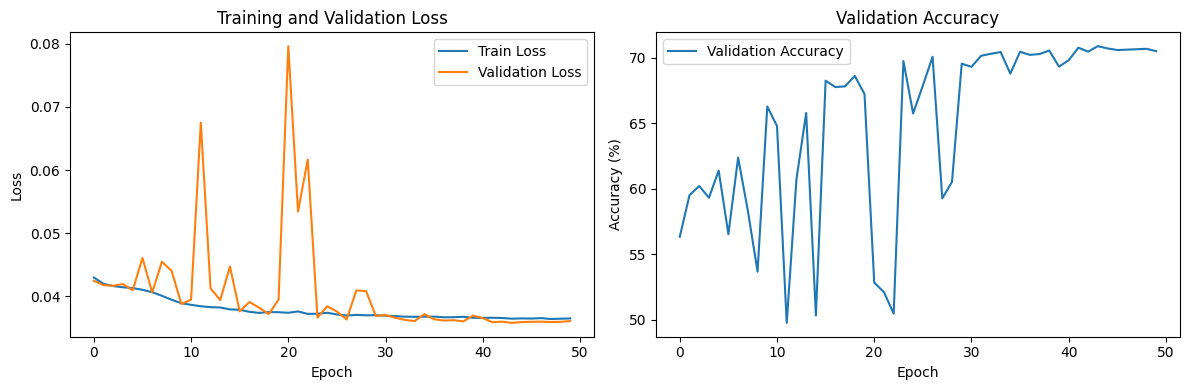


Evaluating best model on validation set:


Evaluating on Validation set: 100%|██████████| 146/146 [00:46<00:00,  3.17it/s]



Validation Set Results:
              precision    recall  f1-score   support

    Electron       0.71      0.69      0.70     37170
      Photon       0.71      0.72      0.71     37530

    accuracy                           0.71     74700
   macro avg       0.71      0.71      0.71     74700
weighted avg       0.71      0.71      0.71     74700



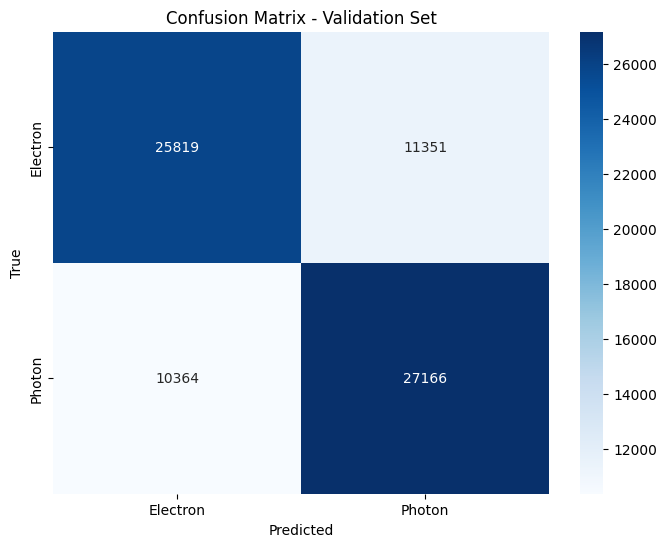

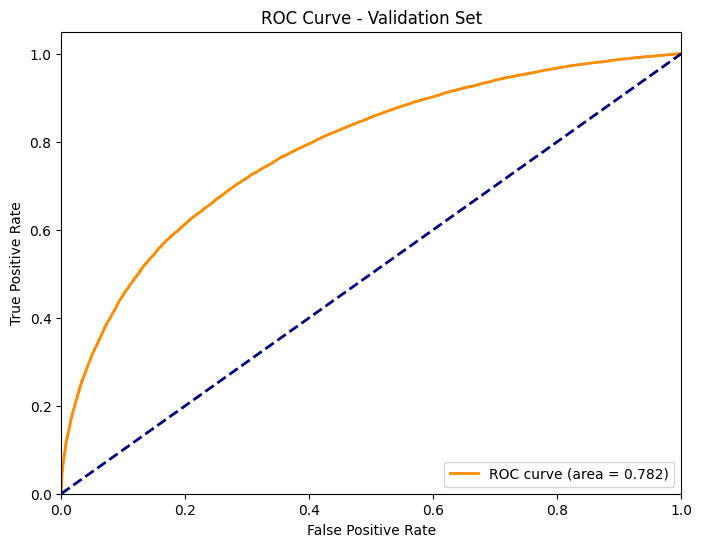


Evaluating best model on test set:


Evaluating on Test set: 100%|██████████| 146/146 [00:45<00:00,  3.24it/s]



Test Set Results:
              precision    recall  f1-score   support

    Electron       0.72      0.69      0.71     37567
      Photon       0.70      0.73      0.71     37133

    accuracy                           0.71     74700
   macro avg       0.71      0.71      0.71     74700
weighted avg       0.71      0.71      0.71     74700



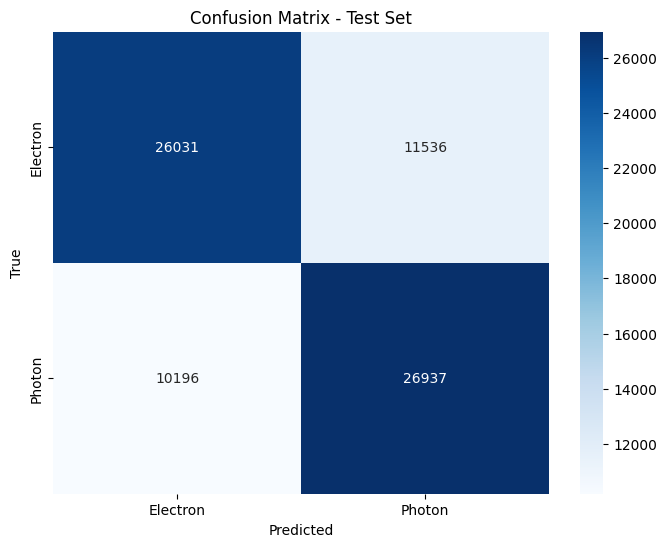

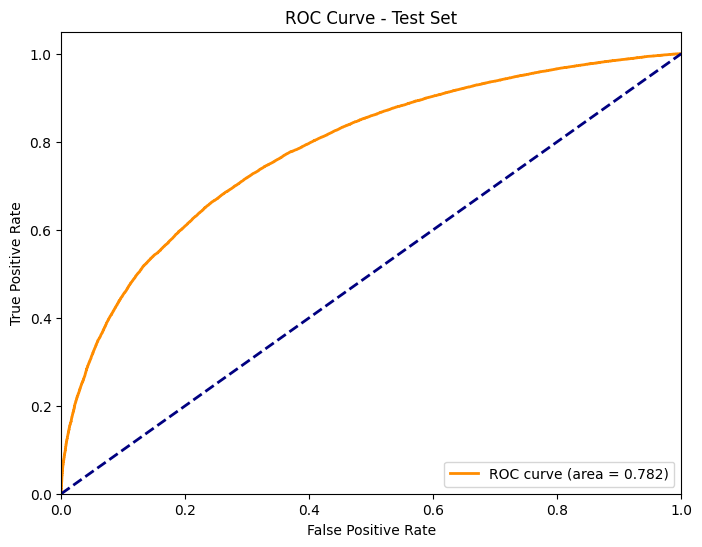


Final Results:
Validation Accuracy: 70.93%
Test Accuracy: 70.91%

Visualizing features with t-SNE...


RuntimeError: mat1 and mat2 shapes cannot be multiplied (262144x1 and 512x128)

In [1]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, OneCycleLR
from torch.utils.data import DataLoader, random_split, ConcatDataset
from torchvision import transforms
import h5py
import numpy as np
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import drive

# Mounting Google Drive
drive.mount('/content/drive')

# Set Random Seeds for Reproducibility
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


class ParticleDataset(torch.utils.data.Dataset):
    def __init__(self, file_path, label, transform=None):
        self.data = h5py.File(file_path, "r")['X'][:]
        self.label = label
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx]  # shape: (32, 32, 2)
        image = np.transpose(image, (2, 0, 1))
        image = torch.tensor(image, dtype=torch.float32)
        if self.transform:
            image = self.transform(image)
        return image, self.label

# Data Augmentations
mean = [0.5, 0.5]
std = [0.5, 0.5]
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),  # Increased rotation angle
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),  # Added affine transform
    transforms.RandomErasing(p=0.3, scale=(0.02, 0.2)),  # Modified erasing parameters
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
    transforms.Normalize(mean, std)
])

# Loading the datasets
photon_dataset = ParticleDataset("/content/drive/My Drive/Data/SinglePhotonPt50_IMGCROPS_n249k_RHv1.hdf5", 1, train_transform)
electron_dataset = ParticleDataset("/content/drive/My Drive/Data/SingleElectronPt50_IMGCROPS_n249k_RHv1.hdf5", 0, train_transform)
dataset = ConcatDataset([photon_dataset, electron_dataset])


# Split into Train, Validation, and Test Sets
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Apply test transforms to validation and test datasets
def apply_test_transform(dataset, transform):
    for i in range(len(dataset)):
        img, label = dataset.dataset.datasets[0][dataset.indices[i]] if dataset.indices[i] < len(dataset.dataset.datasets[0]) else dataset.dataset.datasets[1][dataset.indices[i] - len(dataset.dataset.datasets[0])]
        img = torch.tensor(np.transpose(img, (2, 0, 1)), dtype=torch.float32)
        img = transform(img)
        dataset.dataset.datasets[0][dataset.indices[i]] = (img, label) if dataset.indices[i] < len(dataset.dataset.datasets[0]) else dataset.dataset.datasets[1][dataset.indices[i] - len(dataset.dataset.datasets[0])]
    return dataset

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=512, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False, num_workers=2, pin_memory=True)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Squeeze and Excitation Block
class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        super().__init__()
        self.squeeze = nn.AdaptiveAvgPool2d(1)
        self.excitation = nn.Sequential(
            nn.Linear(channels, channels // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channels // reduction, channels, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        b, c, _, _ = x.size()
        squeeze = self.squeeze(x).view(b, c)
        excitation = self.excitation(squeeze).view(b, c, 1, 1)
        return x * excitation

# Pre-activation Residual Block with SE
class PreActResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.se = SEBlock(out_channels)

        self.downsample = None
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride)
            )

    def forward(self, x):
        identity = x
        out = self.relu(self.bn1(x))

        if self.downsample is not None:
            identity = self.downsample(out)

        out = self.conv1(out)
        out = self.conv2(self.relu(self.bn2(out)))
        out = self.se(out)

        return out + identity

# ResNet-15 like architecture
class ImprovedResNet15(nn.Module):
    def __init__(self, num_classes=2):
        super().__init__()
        self.init = nn.Sequential(
            nn.Conv2d(2, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, padding=1, groups=32),
            nn.Conv2d(32, 64, kernel_size=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True)
        )

        # Residual blocks
        self.layer1 = self._make_layer(64, 64, 2)
        self.layer2 = self._make_layer(64, 128, 2, stride=2)
        self.layer3 = self._make_layer(128, 256, 2, stride=2)
        self.layer4 = self._make_layer(256, 512, 2, stride=2)

        # Global pooling and FC with additional features
        self.pool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.5)  # Increased dropout

        # Adding a small attention mechanism at the end
        self.attention = nn.Sequential(
            nn.Linear(512, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 512),
            nn.Sigmoid()
        )
        self.fc = nn.Linear(512, num_classes)

    def _make_layer(self, in_c, out_c, blocks, stride=1):
        layers = [PreActResidualBlock(in_c, out_c, stride)]
        for _ in range(1, blocks):
            layers.append(PreActResidualBlock(out_c, out_c))
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.init(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)

        att = self.attention(x)
        x = x * att

        x = self.dropout(x)
        return self.fc(x)

# Focal Loss
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=0.25):
        super().__init__()
        self.gamma = gamma
        self.alpha = alpha

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = (self.alpha * (1 - pt) ** self.gamma * ce_loss)
        return focal_loss.mean()

# Mixup Function
def mixup_data(x, y, alpha=0.2):
    '''Returns mixed inputs, pairs of targets, and lambda'''
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1

    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

model = ImprovedResNet15().to(device)
criterion = FocalLoss(gamma=2.0, alpha=0.25)
optimizer = optim.AdamW(model.parameters(), lr=5e-4, weight_decay=1e-4)
scheduler = OneCycleLR(optimizer, max_lr=1e-3, epochs=50, steps_per_epoch=len(train_loader))
scaler = torch.cuda.amp.GradScaler()

# Training with Mixup
def train_model(model, train_loader, val_loader, epochs, patience=10):
    best_acc = 0
    counter = 0
    history = {'train_loss': [], 'val_loss': [], 'val_acc': []}

    for epoch in range(epochs):
        model.train()
        running_loss = 0
        loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{epochs}]")

        for images, labels in loop:
            images, labels = images.to(device), labels.to(device)

            # Apply mixup with 50% probability
            use_mixup = np.random.random() > 0.5
            if use_mixup:
                images, targets_a, targets_b, lam = mixup_data(images, labels)

            optimizer.zero_grad()

            with torch.cuda.amp.autocast():
                outputs = model(images)
                if use_mixup:
                    loss = mixup_criterion(criterion, outputs, targets_a, targets_b, lam)
                else:
                    loss = criterion(outputs, labels)

            scaler.scale(loss).backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            scaler.step(optimizer)
            scaler.update()
            scheduler.step()

            running_loss += loss.item()
            loop.set_postfix(loss=running_loss/(loop.n+1))

        train_loss = running_loss/len(train_loader)
        history['train_loss'].append(train_loss)

        # Validation
        model.eval()
        correct = 0
        total = 0
        val_loss = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_acc = 100 * correct / total
        val_loss = val_loss / len(val_loader)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        print(f"Epoch {epoch+1}/{epochs}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

        # Early stopping check
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), "best_resnet15_model.pth")
            print(f"Model saved with validation accuracy: {best_acc:.2f}%")
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.title('Validation Accuracy')

    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()

    return history

# Evaluation
def evaluate_model(model, loader, name="Test"):
    model.eval()
    y_true, y_pred, y_scores = [], [], []

    with torch.no_grad():
        for images, labels in tqdm(loader, desc=f"Evaluating on {name} set"):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            scores = F.softmax(outputs, dim=1)
            preds = outputs.argmax(dim=1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_scores.extend(scores.cpu().numpy())

    # Calculate metrics
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_scores = np.array(y_scores)

    print(f"\n{name} Set Results:")
    print(classification_report(y_true, y_pred, target_names=["Electron", "Photon"]))

    # Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Electron", "Photon"],
                yticklabels=["Electron", "Photon"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {name} Set")
    plt.savefig(f'confusion_matrix_{name.lower()}.png')
    plt.show()

    # ROC Curve and AUC
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, _ = roc_curve(y_true, y_scores[:, 1])  # For photon class
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name} Set')
    plt.legend(loc="lower right")
    plt.savefig(f'roc_curve_{name.lower()}.png')
    plt.show()

    return np.mean(y_pred == y_true) * 100

# === Train & Evaluate ===
print("Starting training...")
history = train_model(model, train_loader, val_loader, epochs=50, patience=10)

# Load best model
model.load_state_dict(torch.load("best_resnet15_model.pth"))

# Evaluate on validation set
print("\nEvaluating best model on validation set:")
val_acc = evaluate_model(model, val_loader, name="Validation")

# Evaluate on test set
print("\nEvaluating best model on test set:")
test_acc = evaluate_model(model, test_loader, name="Test")

print(f"\nFinal Results:")
print(f"Validation Accuracy: {val_acc:.2f}%")
print(f"Test Accuracy: {test_acc:.2f}%")

# Feature Visualization
def visualize_features(model, test_loader):
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)

    class FeatureExtractor(nn.Module):
        def __init__(self, model):
            super().__init__()
            self.features = nn.Sequential(*list(model.children())[:-1])

        def forward(self, x):
            x = self.features(x)
            return x

    feature_extractor = FeatureExtractor(model).to(device)
    features = feature_extractor(images)
    features = features.view(features.size(0), -1)

    from sklearn.manifold import TSNE

    n_samples = min(500, len(features))
    features = features[:n_samples].cpu().detach().numpy()
    labels = labels[:n_samples].cpu().numpy()

    print("Performing t-SNE dimensionality reduction...")
    tsne = TSNE(n_components=2, random_state=42)
    features_2d = tsne.fit_transform(features)

    # Plot
    plt.figure(figsize=(10, 8))
    for i in range(2):  # 0: Electron, 1: Photon
        plt.scatter(
            features_2d[labels == i, 0],
            features_2d[labels == i, 1],
            label=["Electron", "Photon"][i],
            alpha=0.6
        )






In [3]:
torch.save(model.state_dict(), '/content/drive/MyDrive/best_resnet_model.pth')
from torchsummary import summary
summary(model, (2, 32, 32))

# === Export Model ===
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'val_accuracy': val_acc,
    'test_accuracy': test_acc,
}, "resnet15_optimized_full.pth")

print("\nOptimized ResNet-15 model has been trained and saved successfully!")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             608
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]             320
            Conv2d-5           [-1, 64, 32, 32]           2,112
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
       BatchNorm2d-8           [-1, 64, 32, 32]             128
              ReLU-9           [-1, 64, 32, 32]               0
           Conv2d-10           [-1, 64, 32, 32]          36,928
      BatchNorm2d-11           [-1, 64, 32, 32]             128
             ReLU-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 64, 32, 32]          36,928
AdaptiveAvgPool2d-14             [-1, 6